In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
alunas = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=f")
alunas.head()

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F


In [4]:
alunos = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking/?qtd=200&sexo=m")
alunos.head()

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M


In [5]:
print("Quantidade total de alunos(as):" + str(len(alunos) + len(alunas)))

Quantidade total de alunos(as):400


In [6]:
frames = [alunos, alunas]
nomes = pd.concat(frames)['nome'].to_frame() 
#concatenando os dois dataframes, porém só a coluna Nome

In [7]:
nomes.sample(5)

,nome
91,WESLEY
181,YURI
15,LETICIA
122,CINTIA
3,ANTONIA


In [8]:
np.random.seed(123)

In [9]:
total_alunos = len(nomes)
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1 #dando id's aleatórios

nomes.sample(5)

,nome,id_aluno
188,VALDECIR,369
57,IGOR,303
3,ANTONIA,382
182,LIDIANE,33
30,ELIANE,111


In [10]:
dominios = ['@dominio.com.br', '@servico.com']
nomes['dominio'] = np.random.choice(dominios, total_alunos) #dando dominios aleatórios para cada aluno

nomes.sample(5)

,nome,id_aluno,dominio
84,FATIMA,78,@dominio.com.br
0,MARIA,331,@servico.com
179,LILIANE,340,@dominio.com.br
10,LUIS,174,@dominio.com.br
171,VALDEMIR,45,@dominio.com.br


In [11]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
#unindo a coluna nome com dominio e deixando tudo em minúsculo
nomes.sample(5)

,nome,id_aluno,dominio,email
114,ELZA,320,@dominio.com.br,elza@dominio.com.br
57,IGOR,303,@servico.com,igor@servico.com
85,FABRICIO,221,@dominio.com.br,fabricio@dominio.com.br
183,MARLON,8,@dominio.com.br,marlon@dominio.com.br
189,WESLEI,137,@dominio.com.br,weslei@dominio.com.br


In [12]:
!pip3 install html5lib 
!pip3 install lxml 

In [13]:
import html5lib

url = 'http://tabela-cursos.herokuapp.com/index.html'
cursos = pd.read_html(url)

cursos #lista

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

In [14]:
cursos = cursos[0] #transformando a lista em dataframe

In [15]:
cursos.head()

,Nome do curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python


In [16]:
cursos = cursos.rename(columns={'Nome do curso' : 'nome_do_curso'})
cursos

,nome_do_curso
0,Lógica de programação
1,Java para Web
2,C# para Web
3,Ruby on Rails
4,Cursos de Python
5,PHP com MySql
6,.NET para web
7,Novas integrações com Java
8,TDD com Java
9,Código limpo com C#


In [17]:
cursos['id'] = cursos.index + 1 #começa do 1

In [18]:
cursos.head()

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5


In [19]:
cursos = cursos.set_index('id')

In [20]:
cursos.head()

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python


In [21]:
nomes['matriculas'] = ((np.random.exponential(size=total_alunos)+1)*1.5).astype(int) 
# np.random.exponential -> Draw samples from an exponential distribution

In [22]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,JOSE,235,@dominio.com.br,jose@dominio.com.br,1
1,JOAO,43,@servico.com,joao@servico.com,1
2,ANTONIO,304,@servico.com,antonio@servico.com,5
3,FRANCISCO,156,@dominio.com.br,francisco@dominio.com.br,6
4,CARLOS,343,@servico.com,carlos@servico.com,1
...,...,...,...,...,...
195,ROSANE,231,@dominio.com.br,rosane@dominio.com.br,1
196,IVONETE,99,@servico.com,ivonete@servico.com,4
197,LUCIANE,323,@dominio.com.br,luciane@dominio.com.br,5
198,ISADORA,383,@dominio.com.br,isadora@dominio.com.br,2


In [23]:
nomes.matriculas.describe()

count    400.00000
mean       2.53750
std        1.59372
min        1.00000
25%        1.00000
50%        2.00000
75%        3.00000
max       13.00000
Name: matriculas, dtype: float64

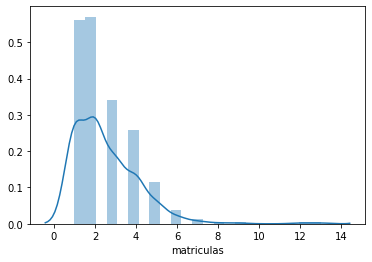

In [24]:
sns.distplot(nomes.matriculas)

In [25]:
nomes.matriculas.value_counts()

2     119
1     117
3      71
4      54
5      24
6       8
7       3
13      1
12      1
9       1
8       1
Name: matriculas, dtype: int64

In [26]:
nomes.sample(5)

,nome,id_aluno,dominio,email,matriculas
105,PABLO,371,@dominio.com.br,pablo@dominio.com.br,2
183,MARLON,8,@dominio.com.br,marlon@dominio.com.br,1
10,SANDRA,125,@dominio.com.br,sandra@dominio.com.br,3
139,MARGARIDA,71,@dominio.com.br,margarida@dominio.com.br,2
40,APARECIDA,139,@servico.com,aparecida@servico.com,2


In [27]:
todas_matriculas = [];
x = np.random.rand(20) #Random values in a given shape
prob = x/sum(x)

In [28]:
for index, row in nomes.iterrows(): #Iterate over DataFrame rows as (index, Series) pairs. Ou seja, "retorna" linha a linha
  id = row.id_aluno;
  matriculas = row.matriculas;
  for i in range(matriculas):
    mat = [id, np.random.choice(cursos.index, p = prob)]
    todas_matriculas.append(mat)

matriculas = pd.DataFrame(todas_matriculas, columns=['id_aluno', 'id_curso'])
matriculas.head()

,id_aluno,id_curso
0,235,8
1,43,6
2,304,7
3,304,18
4,304,11


In [29]:
matriculas_por_curso = matriculas.groupby('id_curso').count().join(cursos['nome_do_curso']).rename(columns={'id_aluno': 'alunos_inscritos'})

In [30]:
matriculas_por_curso.head()

,alunos_inscritos,nome_do_curso
id_curso,,
1,30,Lógica de programação
2,57,Java para Web
3,68,C# para Web
4,61,Ruby on Rails
5,3,Cursos de Python


In [31]:
!pip install sqlalchemy

In [32]:
from sqlalchemy import create_engine, MetaData, Table

In [33]:
engine = create_engine('sqlite:///:memory:') #salvando na memória. poderia ser um localhost

In [34]:
matriculas_por_curso.to_sql('matriculas',engine)

In [35]:
print(engine.table_names())

['matriculas']


In [36]:
query = 'select * from matriculas where alunos_inscritos < 20' #buscando no banco de dados

In [37]:
pd.read_sql(query, engine)

,id_curso,alunos_inscritos,nome_do_curso
0,5,3,Cursos de Python
1,19,9,Boas práticas em Java


In [38]:
muitas_matriculas = pd.read_sql_table('matriculas', engine, columns=['nome_do_curso', 'alunos_inscritos'])
muitas_matriculas

,nome_do_curso,alunos_inscritos
0,Lógica de programação,30
1,Java para Web,57
2,C# para Web,68
3,Ruby on Rails,61
4,Cursos de Python,3
5,PHP com MySql,39
6,.NET para web,62
7,Novas integrações com Java,47
8,TDD com Java,70
9,Código limpo com C#,87


In [39]:
muitas_matriculas = muitas_matriculas.query('alunos_inscritos > 70')
muitas_matriculas

,nome_do_curso,alunos_inscritos
9,Código limpo com C#,87
10,Preparatório para certificação Java,91
16,Internet das coisas,82
17,Programação funcional,74
19,Orientação objetos com Java,72


In [40]:
muitas_matriculas.to_sql('muitas_matriculas', con=engine) #escrevendo no banco

In [41]:
print(engine.table_names())

['matriculas', 'muitas_matriculas']


In [43]:
id_curso = 16
proxima_turma = matriculas.query("id_curso == {}".format(id_curso))
proxima_turma

,id_aluno,id_curso
101,76,16
122,268,16
173,21,16
201,53,16
261,201,16
288,22,16
384,399,16
441,243,16
470,282,16
498,38,16


In [44]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno')) #unindo as duas tabelas pelo id do aluno

,id_curso,nome,dominio,email,matriculas
id_aluno,,,,,
21,16,CICERO,@servico.com,cicero@servico.com,3
22,16,IVAN,@dominio.com.br,ivan@dominio.com.br,5
38,16,ALVARO,@dominio.com.br,alvaro@dominio.com.br,9
38,16,ALVARO,@dominio.com.br,alvaro@dominio.com.br,9
53,16,MARCO,@servico.com,marco@servico.com,1
59,16,HELENA,@dominio.com.br,helena@dominio.com.br,2
63,16,FABIANA,@dominio.com.br,fabiana@dominio.com.br,5
76,16,DIEGO,@servico.com,diego@servico.com,6
85,16,TAINARA,@servico.com,tainara@servico.com,2


In [45]:
proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'] #apenas a coluna nome

#retornou uma lista

id_aluno
21        CICERO
22          IVAN
38        ALVARO
38        ALVARO
53         MARCO
59        HELENA
63       FABIANA
76         DIEGO
85       TAINARA
113      LUCIANA
155        NEUSA
201      OSVALDO
236      BEATRIZ
243    ALEXANDRO
248      ISABELA
248      ISABELA
268      MATHEUS
279       SAMARA
282       ALISON
295        KATIA
311      VITORIA
313        JOICE
313        JOICE
336       JOSEFA
336       JOSEFA
373         TAIS
399       ISRAEL
Name: nome, dtype: object

In [49]:
proxima_turma = proxima_turma.set_index('id_aluno').join(nomes.set_index('id_aluno'))['nome'].to_frame() 
#usando o to_frame para retornar um DF
proxima_turma

,nome
id_aluno,
21,CICERO
22,IVAN
38,ALVARO
38,ALVARO
53,MARCO
59,HELENA
63,FABIANA
76,DIEGO
85,TAINARA


In [47]:
nome_curso = cursos.loc[id_curso]
nome_curso

nome_do_curso    Estatística básica
Name: 16, dtype: object

In [48]:
nome_curso = nome_curso.nome_do_curso
nome_curso

'Estatística básica'

In [51]:
proxima_turma = proxima_turma.rename(columns= {'nome': 'Alunos do curso de {}'.format(nome_curso)})
proxima_turma

,Alunos do curso de Estatística básica
id_aluno,
21,CICERO
22,IVAN
38,ALVARO
38,ALVARO
53,MARCO
59,HELENA
63,FABIANA
76,DIEGO
85,TAINARA
